<h1>Import Libraries</h1>

<p>Berikut merupakan Libraries yang akan digunakan untuk Project Recommendation System ini.</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# import wget
from zipfile import ZipFile

<h1>Data Understanding</h1>

<p>Berikut merupakan kode yang digunakan untuk mend-download Datasets yang akan digunakan pada Project ini.</p>

In [ ]:
# url = 'https://files.grouplens.org/datasets/movielens/ml-25m.zip'

# wget.download(url)
# print('Download Succeed')

<p>Setelah berhasil di download, langkah selanjutnya adalah melakukan extract terhadap file <b>.zip</b></p>

In [ ]:
# # Unzip
# with ZipFile('ml-25m.zip', 'r') as zObject:
#     zObject.extractall()

# print('Extract Succeed')

<p>Setelah berhasil di extract didapatkan 7 files berbeda, terdiri dari 6 files <b>.csv</b> dan 1 file <b>.txt</b>. Langkah selanjutnya adalah membaca Datasets yang merupakan file ber-extension <b>.csv</b></p>

<p>Kode di bawah ini merupakan kode yang digunakan untuk membaca Datasets, kemudian di convert kedalam bentuk DataFrame menggunakan libabry pandas.</p>

In [3]:
genome_scores = pd.read_csv('Datasets/genome-scores.csv')
genome_tags = pd.read_csv('Datasets/genome-tags.csv')
links = pd.read_csv('Datasets/links.csv')
movies = pd.read_csv('Datasets/movies.csv')
ratings = pd.read_csv('Datasets/ratings.csv')
tags = pd.read_csv('Datasets/tags.csv')

print(f'Jumlah Data Genome Scores: {len(genome_scores["movieId"].unique())}')
print(f'Jumlah Data Genome Tags: {len(genome_tags["tagId"].unique())}')
print(f'Jumlah Data Links: {len(links["movieId"].unique())}')
print(f'Jumlah Data Movies: {len(movies["movieId"].unique())}')
print(f'Jumlah Data Ratings: {len(ratings["userId"].unique())}')
print(f'Jumlah Data Tags: {len(tags["userId"].unique())}')

Jumlah Data Genome Scores: 13816
Jumlah Data Genome Tags: 1128
Jumlah Data Links: 62423
Jumlah Data Movies: 62423
Jumlah Data Ratings: 162541
Jumlah Data Tags: 14592


<p>Output dari kode di atas merupakan jumlah data unique dari masing-masing DataFrame-nya.</p>

<h2>Univariate Exploratory Data Analysis</h2>

<p>Kode di bawah ini berfungsi untuk melakukan <b>Univariate EDA</b> terhadap masing-masing DataFrame, yang dilakukan dengan cara melihat detail dari struktur DataFrame-nya, menggunakan built-in function <b>.info()</b> dari pandas.</p>

<h3>Genome Scores</h3>

In [4]:
genome_scores.info()
genome_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

<p>Untuk DataFrame <b>Genome Scores</b> terdapat <b>15584448</b> data, dengan total features sebanyak <b>3</b>.</p>

In [11]:
print(f'Number of Missiing Values:\n{genome_scores.isnull().sum()}\n')
print(f'Number of Duplicate: {genome_scores.duplicated().sum()}')

Number of Missiing Values:
movieId      0
tagId        0
relevance    0
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>genome_scores</b> tidak terdapat data missing dan duplicate.</p>

<h3>Genome Tags</h3>

In [4]:
genome_tags.info()
genome_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

<p>Untuk DataFrame <b>Genome Tags</b> terdapat <b>1128</b> data, dengan total features sebanyak <b>2</b>.</p>

In [12]:
print(f'Number of Missiing Values:\n{genome_tags.isnull().sum()}\n')
print(f'Number of Duplicate: {genome_tags.duplicated().sum()}')

Number of Missiing Values:
tagId    0
tag      0
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>genome_tags</b> tidak terdapat data missing dan duplicate.</p>

<h3>Links</h3>

In [5]:
links.info()
links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

<p>Untuk DataFrame <b>Links</b> terdapat <b>62423</b> data, dengan total features sebanyak <b>3</b>.</p>

In [13]:
print(f'Number of Missiing Values:\n{links.isnull().sum()}\n')
print(f'Number of Duplicate: {links.duplicated().sum()}')

Number of Missiing Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>links</b> tidak terdapat data duplicate, tetapi terdapat data missing sebanyak 107 data pada feature <b>tmdbId</b>.</p>

<h3>Movies</h3>

In [6]:
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p>Untuk DataFrame <b>Movies</b> terdapat <b>62423</b> data, dengan total features sebanyak <b>3</b>.</p>

In [14]:
print(f'Number of Missiing Values:\n{movies.isnull().sum()}\n')
print(f'Number of Duplicate: {movies.duplicated().sum()}')

Number of Missiing Values:
movieId    0
title      0
genres     0
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>movies</b> tidak terdapat data missing dan duplicate.</p>

<h3>Ratings</h3>

In [7]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

<p>Untuk DataFrame <b>Ratings</b> terdapat <b>25000095</b> data, dengan total features sebanyak <b>4</b>.</p>

In [16]:
print(f'Number of Missiing Values:\n{ratings.isnull().sum()}\n')
print(f'Number of Duplicate: {ratings.duplicated().sum()}')

Number of Missiing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>ratings</b> tidak terdapat data missing dan duplicate.</p>

<h3>Tags</h3>

In [8]:
tags.info()
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

<p>Untuk DataFrame <b>Tags</b> terdapat <b>1093360</b> data, dengan total features sebanyak <b>4</b>.</p>

In [17]:
print(f'Number of Missiing Values:\n{tags.isnull().sum()}\n')
print(f'Number of Duplicate: {tags.duplicated().sum()}')

Number of Missiing Values:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Number of Duplicate: 0


<p>Dari informasi missing & duplicate data dia atas, dapat disimpulkan bahwa pada DataFrame <b>tags</b> tidak terdapat data duplicate, tetapi terdapat data missing sebanyak 16 data pada feature <b>tag</b>.</p>

<h1>Data Preprocessing</h1>

<p>Berdasarkan informasi di atas, Setiap DataFrame nya akan dibagi kedalam 3 kategori berbeda, yaitu <b>movie</b>, <b>user</b>, dan <b>score relevansi film</b>.</p>

<p>Berikut merupakan kode untuk menggabungkan DataFrame yang memiliki kategori sama, kemudian melihat jumlah datanya secara keseluruhan berdasarkan nilai <b>unique</b> nya.</p>

In [9]:
# Concatenating tagId on Genome Category
all_genome_tags = np.concatenate((
    genome_scores['tagId'].unique(),
    genome_tags['tagId'].unique()
))

all_genome_tags = np.sort(np.unique(all_genome_tags))

print(f'Jumlah seluruh data Genome berdasarkan tagId: {len(all_genome_tags)}')

Jumlah seluruh data Genome berdasarkan tagId: 1128


In [10]:
# Concatenating movieId on Movies Category
all_movies = np.concatenate((
    links['movieId'].unique(),
    movies['movieId'].unique(),
    ratings['movieId'].unique(),
    tags['movieId'].unique()
))

all_movies = np.sort(np.unique(all_movies))

print(f'Jumlah seluruh Movies berdasarkan movieId: {len(all_movies)}')

Jumlah seluruh Movies berdasarkan movieId: 62423


In [11]:
# Concatenating userId on Users Category
all_users = np.concatenate((
    ratings['userId'].unique(),
    tags['userId'].unique()
))

all_users = np.sort(np.unique(all_users))

print(f'Jumlah seluruh Users berdasarkan userId: {len(all_users)}')

Jumlah seluruh Users berdasarkan userId: 162541


<p>Dari informasi di atas, jumlah data pada relevancy score(<b>genome_scores</b>) sangatlah sedikit yaitu hanya berjumlah 1.128 data. Sedangkan jumlah data pada movies dan users masing-masing berjumlah 62.423 dan 162.541. Sehingga, data yang akan digunakan pada project ini adalah <b>movies</b> dan <b>users</b>.</p>

<h2>Data Cleaning</h2>

<p>Tahap pertama yang akan dilakukan pada proses Data Preprocessing ini adalah <b>Data Cleaning</b>. Proses Data Cleaning ini akan diimplementasikan pada DataFrame <b>movies</b> dan <b>ratings</b>.</p>

<h3>Movies</h3>

In [12]:
movies

movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
62418                                        Drama  
62419                                  Documentary  
62420                                 Comedy|Drama  
62421                           (no genres listed)  
62422                       Action|Adventure|Drama  

[62423 rows x 3 columns]

<p>Dari output DataFrame movies di atas, terlihat jelas pada feature <b>title</b>, setiap value nya terdapat informasi tahun, sebagai contoh <b>"Toy Story (1995)"</b>. Ini harus dipisahkan terlebih dahulu antara Judul dan tahunnya.</p>

<p>Kode di bawah berfungsi untuk memisahkan antara judul dan tahun pada feature <b>"title"</b>, dengan cara membuat feature baru bernama <b>"year"</b>.</p>

In [13]:
def removeYear(token_title):
    token = token_title
    token.pop()

    return token

def newTitle(token_title):
    return ' '.join(token_title)

movies['year'] = movies['title'].str.extract('([0-9]{4})')
movies['title_tokenization'] = movies['title'].apply(lambda x: x.split())
movies['title_tokenization'] = movies['title_tokenization'].apply(removeYear)
movies['Title'] = movies['title_tokenization'].apply(newTitle)
movies = movies.drop(columns=['title', 'title_tokenization'])

movies.head()

movieId                                       genres  year  \
0        1  Adventure|Animation|Children|Comedy|Fantasy  1995   
1        2                   Adventure|Children|Fantasy  1995   
2        3                               Comedy|Romance  1995   
3        4                         Comedy|Drama|Romance  1995   
4        5                                       Comedy  1995   

                         Title  
0                    Toy Story  
1                      Jumanji  
2             Grumpier Old Men  
3            Waiting to Exhale  
4  Father of the Bride Part II

<p>Output di atas merupakan hasil dari pemisahan antara judul dengan tahun pada feature <b>title</b>. Terlihat sekarang terdapat feature baru bernama <b>year</b> yang memiliki values tahun terbit film.</p>

<h3>Ratings</h3>

In [14]:
ratings

userId  movieId  rating   timestamp
0              1      296     5.0  1147880044
1              1      306     3.5  1147868817
2              1      307     5.0  1147868828
3              1      665     5.0  1147878820
4              1      899     3.5  1147868510
...          ...      ...     ...         ...
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

[25000095 rows x 4 columns]

<p>Dari Output DataFrame <b>ratings</b> di atas, terlihat bahwa value pada feature <b>ratings</b> terdapat value <b>3.5</b>, <b>4.5</b>, dan <b>2.5</b>. Selanjutnya akan dilakukan pembulatan pada tiap value nya, sebagai contoh <b>3.5 menjadi 4</b>, <b>4.5 menjadi 5</b>, dan <b>2.5 menjadi 3</b>.</p>

<p>Berikut merupakan kode untuk melihat macam-macam values <b>"rating"</b> pada DataFrame ratings sebelum dilakukan pembulatan.</p>

In [15]:
ratings['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

<p>Dari output di atas, terlihat bahwa terdapat 10 values berbeda pada feature <b>rating</b>.</p>

<p>Di bawah ini merupakan kode yang digunakan untuk melakukan <b>pembulatan ke atas</b> terhadap value dari feature <b>rating</b>.</p>

In [16]:
ratings['rating'] = ratings['rating'].apply(lambda x: np.ceil(x))

ratings['rating'].unique()

array([5., 4., 3., 1., 2.])

<p>Output di atas merupakan <b>hasil</b> setelah dilakukan pembulatan. Terlihat sekarang total dari nilai unique nya menjadi 5.</p>

<p>Selain itu pada DataFrame <b>ratings</b> pun terdapat feature <b>timestamp</b>. Timestamp merupakan suatu informasi mengenai waktu yang disandikan ke dalam beberapa characters. Yang mana characters tersebut merepresentasikan kapan suatu peristiwa terjadi, yang mengandung informasi mengenai tanggal dan waktu, yang keakuratannya bisa sampai sepersekian detik.</p>

<p>Berikut merupakan kode untuk melakukan convert Timestamp ke dalam bentuk <b>DateTime</b>.</p>

In [17]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings.head()

userId  movieId  rating           timestamp
0       1      296     5.0 2006-05-17 15:34:04
1       1      306     4.0 2006-05-17 12:26:57
2       1      307     5.0 2006-05-17 12:27:08
3       1      665     5.0 2006-05-17 15:13:40
4       1      899     4.0 2006-05-17 12:21:50

<p>Bisa dilihat dari output di atas, bahwa sekarang value dari feature <b>timestamp</b> sudah berbentuk <b>DateTime</b>.</p>

<p>Selanjutnya akan dilakukan <b>Merging DataFrame</b> antara <b>movies</b> dan <b>ratings</b>. Di bawah ini merupakan kode untuk melakukan merging, menggunakan built-in function <b>.merge()</b> dari library pandas.</p>

In [18]:
# Merge DataFrame
movies_rating = pd.merge(movies, ratings, on='movieId', how='left')

movies_rating

movieId                                       genres  year  \
0               1  Adventure|Animation|Children|Comedy|Fantasy  1995   
1               1  Adventure|Animation|Children|Comedy|Fantasy  1995   
2               1  Adventure|Animation|Children|Comedy|Fantasy  1995   
3               1  Adventure|Animation|Children|Comedy|Fantasy  1995   
4               1  Adventure|Animation|Children|Comedy|Fantasy  1995   
...           ...                                          ...   ...   
25003466   209157                                        Drama  2018   
25003467   209159                                  Documentary  2001   
25003468   209163                                 Comedy|Drama  2018   
25003469   209169                           (no genres listed)  2001   
25003470   209171                       Action|Adventure|Drama  1962   

                            Title    userId  rating           timestamp  
0                       Toy Story       2.0     4.0 2006-03-03 19:57:00  
1                       Toy Story       3.0     4.0 2015-08-13 13:23:35  
2                       Toy Story       4.0     3.0 2019-11-16 22:44:12  
3                       Toy Story       5.0     4.0 1997-03-17 19:12:29  
4                       Toy Story       8.0     4.0 1998-03-21 15:01:57  
...                           ...       ...     ...                 ...  
25003466                       We  119571.0     2.0 2019-11-20 20:12:28  
25003467       Window of the Soul  115835.0     3.0 2019-11-20 20:16:25  
25003468                Bad Poems    6964.0     5.0 2019-11-20 21:21:53  
25003469             A Girl Thing  119571.0     3.0 2019-11-20 23:17:06  
25003470  Women of Devil's Island  119571.0     3.0 2019-11-20 23:18:57  

[25003471 rows x 7 columns]

<p>Output di atas merupakan hasil merging dari DataFrame <b>movies</b> dan <b>ratings</b>. Yang mana hasil merging kedua DataFrame ini disimpan kedalam variable <b>movies_rating</b>.</p>

<p>Dikarenakan keterbatasan sumber daya komputasi, maka jumlah Data yang akan digunakan pada project ini akan <b>dikurangi</b>. Data yang awalnya berjumlah 25.003.471, akan dikurangi menjadi 1.000.000</p>
<p>Di bawah ini merupakan kode yang digunakan untuk mengurangi jumlah data.</p>

In [19]:
# Reduce Datasets
movies_rating = movies_rating.head(1_000_000)

movies_rating.info()
movies_rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   movieId    1000000 non-null  int64         
 1   genres     1000000 non-null  object        
 2   year       1000000 non-null  object        
 3   Title      1000000 non-null  object        
 4   userId     1000000 non-null  float64       
 5   rating     1000000 non-null  float64       
 6   timestamp  1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 53.4+ MB


movieId                                       genres  year      Title  \
0        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
1        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
2        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
3        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
4        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   

   userId  rating           timestamp  
0     2.0     4.0 2006-03-03 19:57:00  
1     3.0     4.0 2015-08-13 13:23:35  
2     4.0     3.0 2019-11-16 22:44:12  
3     5.0     4.0 1997-03-17 19:12:29  
4     8.0     4.0 1998-03-21 15:01:57

<p>Dari Informasi di atas, terlihat jelas bahwa sekarang jumlah data sudah menjadi <b>1.000.000</b></p>
<p>Kode di bawah ini berfungsi untuk melihat kondisi data jika terdapat <b>missing values</b>.</p>

In [20]:
movies_rating.isnull().sum()

movieId      0
genres       0
year         0
Title        0
userId       0
rating       0
timestamp    0
dtype: int64

<p>Dapat dilihat setelah kode di atas di running, tidak terdapat Missing Values pada DataFrame <b>movies_rating</b> di masing-masing features nya.</p>

<p>Kode di bawah ini berfungsi untuk melihat jumlah <b>movies</b> pada DataFrame setelah dikurangi menjadi <b>1M</b>.</p>

In [21]:
movies_rating['movieId'].value_counts()

movieId
110    59184
1      57309
50     55366
47     50596
32     47054
       ...  
134       31
51        28
133       20
109       16
143       14
Name: count, Length: 144, dtype: int64

<p>Dari output di atas, terlihat bahwa jumlah movies ada sebanyak <b>144</b>.</p>

<p>Agar hasil rekomendasi menjadi semakin optimal dan akurat, maka akan dilihat terlebih dahulu jumlah user yang memberikan rating pada masing-masing Title-nya. Nantinya movie yang memiliki jumlah pemberi rating < 100 akan di <b>remove</b> dari DataFrame.</p>

<p>Berikut merupakan kode yang digunakan untuk melihat jumlah pemberi review pada masing-masing Title.</p>

In [22]:
movies_rating_groupby_title = movies_rating.groupby('Title').count()

In [23]:
movies_rating_groupby_title.head()

movieId  genres   year  userId  rating  \
Title                                                                    
Ace Ventura: When Nature Calls    21552   21552  21552   21552   21552   
Across the Sea of Time               75      75     75      75      75   
American President, The           17042   17042  17042   17042   17042   
Angela                               42      42     42      42      42   
Angels and Insects                 2441    2441   2441    2441    2441   

                                timestamp  
Title                                      
Ace Ventura: When Nature Calls      21552  
Across the Sea of Time                 75  
American President, The             17042  
Angela                                 42  
Angels and Insects                   2441

<p>Dari output di atas, kita dapat melihat jumlah pemberi rating pada masing-masing title movie. Sebagai contoh, pada movie berjudul <b>Angela</b>, terdapat 42 users yang memberi rating.</p>

<p>Kode di bawah berfungsi untuk melihat Statistics pada variable <b>movies_rating_groupby_title</b>.</p>

In [25]:
movies_rating_groupby_title.describe()

movieId        genres          year        userId        rating  \
count    144.000000    144.000000    144.000000    144.000000    144.000000   
mean    6944.444444   6944.444444   6944.444444   6944.444444   6944.444444   
std    11476.605792  11476.605792  11476.605792  11476.605792  11476.605792   
min       14.000000     14.000000     14.000000     14.000000     14.000000   
25%      534.250000    534.250000    534.250000    534.250000    534.250000   
50%     2482.000000   2482.000000   2482.000000   2482.000000   2482.000000   
75%     7654.250000   7654.250000   7654.250000   7654.250000   7654.250000   
max    59184.000000  59184.000000  59184.000000  59184.000000  59184.000000   

          timestamp  
count    144.000000  
mean    6944.444444  
std    11476.605792  
min       14.000000  
25%      534.250000  
50%     2482.000000  
75%     7654.250000  
max    59184.000000

<p>Dari Statistics di atas dapat dilihat bahwa pada feature <b>rating</b> nilai terkecilnya adalah <b>14</b> dan terbesarnya adalah <b>59.184</b>. Itu berarti ada suatu title movie yang hanya mendapatkan 14 reviews, dan ada juga title movie yang sampai mendapatkan 59.184 reviews. Berdasarkan fakta ini, untuk selanjutnya movie yang memiliki jumlah pemberi rating < 100 akan di drop dari DataFrame.</p>

<p>Kode di bawah ini berfungsi untuk mengetahui total rating pada setiap title movie.</p>

In [28]:
movies_rating.drop(columns=['timestamp']).groupby('Title').sum()

movieId  \
Title                                           
Ace Ventura: When Nature Calls         409488   
Across the Sea of Time                   2775   
American President, The                187462   
Angela                                   5460   
Angels and Insects                     207485   
...                                       ...   
When Night Is Falling                   11172   
White Balloon, The (Badkonake sefid)    41200   
White Squall                           337206   
Wings of Courage                         2145   
Young Poisoner's Handbook, The         133614   

                                                                                 genres  \
Title                                                                                     
Ace Ventura: When Nature Calls        ComedyComedyComedyComedyComedyComedyComedyCome...   
Across the Sea of Time                Documentary|IMAXDocumentary|IMAXDocumentary|IM...   
American President, The               Comedy|Drama|RomanceComedy|Drama|RomanceComedy...   
Angela                                DramaDramaDramaDramaDramaDramaDramaDramaDramaD...   
Angels and Insects                    Drama|RomanceDrama|RomanceDrama|RomanceDrama|R...   
...                                                                                 ...   
When Night Is Falling                 Drama|RomanceDrama|RomanceDrama|RomanceDrama|R...   
White Balloon, The (Badkonake sefid)  Children|DramaChildren|DramaChildren|DramaChil...   
White Squall                          Action|Adventure|DramaAction|Adventure|DramaAc...   
Wings of Courage                      Adventure|Romance|IMAXAdventure|Romance|IMAXAd...   
Young Poisoner's Handbook, The        Crime|DramaCrime|DramaCrime|DramaCrime|DramaCr...   

                                                                                   year  \
Title                                                                                     
Ace Ventura: When Nature Calls        1995199519951995199519951995199519951995199519...   
Across the Sea of Time                1995199519951995199519951995199519951995199519...   
American President, The               1995199519951995199519951995199519951995199519...   
Angela                                1995199519951995199519951995199519951995199519...   
Angels and Insects                    1995199519951995199519951995199519951995199519...   
...                                                                                 ...   
When Night Is Falling                 1995199519951995199519951995199519951995199519...   
White Balloon, The (Badkonake sefid)  1995199519951995199519951995199519951995199519...   
White Squall                          1996199619961996199619961996199619961996199619...   
Wings of Courage                      1995199519951995199519951995199519951995199519...   
Young Poisoner's Handbook, The        1995199519951995199519951995199519951995199519...   

                                            userId   rating  
Title                                                        
Ace Ventura: When Nature Calls        1.751063e+09  59724.0  
Across the Sea of Time                5.846727e+06    231.0  
American President, The               1.386781e+09  63349.0  
Angela                                3.286243e+06    141.0  
Angels and Insects                    1.994220e+08   8677.0  
...                                            ...      ...  
When Night Is Falling                 1.819912e+07    821.0  
White Balloon, The (Badkonake sefid)  4.170588e+07   1948.0  
White Squall                          3.242676e+08  13754.0  
Wings of Courage                      5.271883e+06    200.0  
Young Poisoner's Handbook, The        9.690492e+07   4128.0  

[144 rows x 5 columns]

<p>Dari output di atas, dapat dilihat total rating pada setiap title nya. Sebagai contoh pada title <b>Ace Ventura: When Nature Calls</b>, memiliki total rating sebesar <b>59.724</b></p>

<p>Kode di bawah ini berfungsi untuk mendapatkan title movie dengan pemberi rating paling sedikit 100. Kemudian memasukkan value nya kedalam variable <b>movie_nrating_gt100</b>.</p>

In [29]:
movie_nrating_gt100 = movies_rating_groupby_title[movies_rating_groupby_title['rating'] >= 100]

<p>Setelah didapatkan valuenya, langkah selanjutnya adalah memasukkan seluruh title kedalam variable <b>movie_titles</b> yang merupakan list menggunakan for Loop.</p>

In [30]:
movie_titles = []

for title, values in movie_nrating_gt100.iterrows():
    movie_titles.append(title)

<p>Berikut merupakan kode yang digunakan untuk melihat value dari DataFrame <b>movie_nrating_gt100</b>.</p>

In [31]:
movie_nrating_gt100

movieId  genres   year  userId  rating  \
Title                                                                          
Ace Ventura: When Nature Calls          21552   21552  21552   21552   21552   
American President, The                 17042   17042  17042   17042   17042   
Angels and Insects                       2441    2441   2441    2441    2441   
Anne Frank Remembered                     875     875    875     875     875   
Antonia's Line (Antonia)                 2288    2288   2288    2288    2288   
...                                       ...     ...    ...     ...     ...   
Waiting to Exhale                        2523    2523   2523    2523    2523   
When Night Is Falling                     228     228    228     228     228   
White Balloon, The (Badkonake sefid)      515     515    515     515     515   
White Squall                             3921    3921   3921    3921    3921   
Young Poisoner's Handbook, The           1142    1142   1142    1142    1142   

                                      timestamp  
Title                                            
Ace Ventura: When Nature Calls            21552  
American President, The                   17042  
Angels and Insects                         2441  
Anne Frank Remembered                       875  
Antonia's Line (Antonia)                   2288  
...                                         ...  
Waiting to Exhale                          2523  
When Night Is Falling                       228  
White Balloon, The (Badkonake sefid)        515  
White Squall                               3921  
Young Poisoner's Handbook, The             1142  

[128 rows x 6 columns]

<p>Dari output di atas, dapat dilihat contoh title movie yang memiliki jumlah pemberi rating >= 100. Dan jumlah movie yang termasuk dalam kondisi ini berjumlah <b>128</b> movies.</p>

<p>Kode di bawah ini digunakan untuk menghapus title movie yang memiliki jumlah pemberi rating < 100 pada DataFrame <b>movies_rating</b>.</p>

In [32]:
movies_rating = movies_rating[movies_rating['Title'].isin(movie_titles)]
movies_rating = movies_rating.reset_index(drop=True)

movies_rating.info()
movies_rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999243 entries, 0 to 999242
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    999243 non-null  int64         
 1   genres     999243 non-null  object        
 2   year       999243 non-null  object        
 3   Title      999243 non-null  object        
 4   userId     999243 non-null  float64       
 5   rating     999243 non-null  float64       
 6   timestamp  999243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 53.4+ MB


movieId                                       genres  year      Title  \
0        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
1        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
2        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
3        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
4        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   

   userId  rating           timestamp  
0     2.0     4.0 2006-03-03 19:57:00  
1     3.0     4.0 2015-08-13 13:23:35  
2     4.0     3.0 2019-11-16 22:44:12  
3     5.0     4.0 1997-03-17 19:12:29  
4     8.0     4.0 1998-03-21 15:01:57

<p>DataFrame yang awalnya terdapat <b>1.000.000</b> data setelah dilakukan penghapusan, total datanya menjadi <b>999.243</b> data.</p>

<p>Selanjutnya <b>movies_rating</b> akan diurutkan berdasarkan feature <b>movieId</b>.</p>

In [33]:
fix_movies = movies_rating.sort_values(by='movieId', ascending=True)
fix_movies

movieId                                       genres  year      Title  \
0             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38201         1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38202         1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38203         1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38204         1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
...         ...                                          ...   ...        ...   
996694      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
996695      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
996696      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
996684      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
999242      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   

          userId  rating           timestamp  
0            2.0     4.0 2006-03-03 19:57:00  
38201   108474.0     4.0 2004-10-18 15:03:08  
38202   108476.0     3.0 1997-03-26 04:54:11  
38203   108480.0     1.0 1997-06-12 09:49:22  
38204   108481.0     3.0 1997-01-29 22:07:10  
...          ...     ...                 ...  
996694   15963.0     4.0 2013-08-11 14:57:19  
996695   15987.0     3.0 2004-12-05 11:16:59  
996696   15988.0     4.0 2005-04-08 13:30:49  
996684   15835.0     4.0 2004-08-14 11:55:29  
999242   47655.0     3.0 2010-01-03 22:20:05  

[999243 rows x 7 columns]

<p>Output di atas merupakan tampilan DataFrame setelah dilakukan pengurutan.</p>

<p>Kode di bawah ini berfungsi untuk mengetahui <b>total movie</b> yang terdapat pada DataFrame.</p>

In [34]:
# Mengecek berapa jumlah Movies
len(fix_movies['movieId'].unique())

128

<p>Dari output di atas, dapat disimpulkan bahwa jumlah title movie pada DataFrame ada sebanyak <b>128</b> title.</p>

<p>Kode di bawah ini berfungsi untuk mengetahui <b>total genre</b> yang terdapat pada DataFrame.</p>

In [35]:
# Mengecek berapa jumlah Genres
len(fix_movies['genres'].unique())

52

<p>Dari output di atas, dapat disimpulkan bahwa jumlah genre pada DataFrame ada sebanyak <b>52</b> genre.</p>

<p>Macam-Macam Genrenya dapa dilihat pada output di bawah ini.</p>

In [36]:
fix_movies['genres'].value_counts()

genres
Comedy                                         107605
Drama|Romance                                   67159
Action|Drama|War                                59184
Comedy|Romance                                  57964
Adventure|Animation|Children|Comedy|Fantasy     57309
Crime|Mystery|Thriller                          55366
Mystery|Thriller                                50596
Action|Adventure|Thriller                       48907
Mystery|Sci-Fi|Thriller                         48100
Drama                                           43377
Crime|Drama                                     42715
Comedy|Drama|Romance                            42351
Children|Drama                                  33548
Adventure|Children|Fantasy                      31517
Crime|Drama|Thriller                            29133
Action|Crime|Thriller                           28696
Comedy|Crime|Thriller                           22277
Action|Comedy|Horror|Thriller                   14118
Animation|Children|Drama|Musical|Romance        13461
Action|Adventure|Comedy|Crime                   10958
Drama|Thriller                                  10919
Action|Adventure|Fantasy                        10629
Crime|Drama|Horror|Mystery|Thriller              9237
Adventure|Drama|Fantasy|Mystery|Sci-Fi           8305
Comedy|Drama|Thriller                            8267
Action|Comedy|Crime|Drama|Thriller               7668
Drama|Sci-Fi                                     7450
Drama|War                                        6965
Adventure|Children|Comedy|Musical                6015
Action|Sci-Fi|Thriller                           5450
Action                                           4913
Comedy|Drama                                     4703
Adventure|Comedy|Crime|Romance                   4438
Action|Adventure|Drama                           3921
Comedy|Horror                                    3741
Action|Thriller                                  3095
Crime|Drama|Romance                              3007
Action|Adventure|Romance                         2760
Drama|Mystery|Romance                            2607
Children|Comedy                                  2488
Comedy|Crime                                     2336
Action|Crime|Drama                               2300
Drama|Horror|Thriller                            2114
Documentary                                      2075
Comedy|Horror|Romance                            1936
Thriller                                         1925
Adventure|Animation|Children                     1715
Adventure|Children                               1344
Drama|Mystery                                    1171
Action|Crime|Drama|Thriller                      1129
Adventure|Comedy|Drama                            142
Adventure|Drama                                   137
Name: count, dtype: int64

<p>Dari output di atas, terlihat ada genre bernama <b>Sci-Fi</b> yang merupakan singkatan dari Science Fiction. Tetapi diantara kata <b>"Sci"</b> dan <b>"Fi"</b> terdapat tanda <b>"-"</b>, tentu jika ini dibiarkan akan mempengaruhi performa dari ML Model yang akan dibangun. Maka tanda <b>"-"</b> akan dihapus pada genre Sci-Fi.</p>

<p>Berikut merupakan kode untuk menghapuskan tanda <b>"-"</b>, menggunakan <b>regex</b>.</p>

In [37]:
# replace the matching strings for 'sci-fi' using regex
fix_movies = fix_movies.replace(to_replace ='[nS]ci-Fi', value = 'Scifi', regex = True)
fix_movies.head()

movieId                                       genres  year      Title  \
0            1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38201        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38202        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38203        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38204        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   

         userId  rating           timestamp  
0           2.0     4.0 2006-03-03 19:57:00  
38201  108474.0     4.0 2004-10-18 15:03:08  
38202  108476.0     3.0 1997-03-26 04:54:11  
38203  108480.0     1.0 1997-06-12 09:49:22  
38204  108481.0     3.0 1997-01-29 22:07:10

<p>Setelah dilakukan proses penghapusan, hasilnya dapat dilihat pada output di bawah ini.</p>

In [38]:
fix_movies['genres'].value_counts()

genres
Comedy                                         107605
Drama|Romance                                   67159
Action|Drama|War                                59184
Comedy|Romance                                  57964
Adventure|Animation|Children|Comedy|Fantasy     57309
Crime|Mystery|Thriller                          55366
Mystery|Thriller                                50596
Action|Adventure|Thriller                       48907
Mystery|Scifi|Thriller                          48100
Drama                                           43377
Crime|Drama                                     42715
Comedy|Drama|Romance                            42351
Children|Drama                                  33548
Adventure|Children|Fantasy                      31517
Crime|Drama|Thriller                            29133
Action|Crime|Thriller                           28696
Comedy|Crime|Thriller                           22277
Action|Comedy|Horror|Thriller                   14118
Animation|Children|Drama|Musical|Romance        13461
Action|Adventure|Comedy|Crime                   10958
Drama|Thriller                                  10919
Action|Adventure|Fantasy                        10629
Crime|Drama|Horror|Mystery|Thriller              9237
Adventure|Drama|Fantasy|Mystery|Scifi            8305
Comedy|Drama|Thriller                            8267
Action|Comedy|Crime|Drama|Thriller               7668
Drama|Scifi                                      7450
Drama|War                                        6965
Adventure|Children|Comedy|Musical                6015
Action|Scifi|Thriller                            5450
Action                                           4913
Comedy|Drama                                     4703
Adventure|Comedy|Crime|Romance                   4438
Action|Adventure|Drama                           3921
Comedy|Horror                                    3741
Action|Thriller                                  3095
Crime|Drama|Romance                              3007
Action|Adventure|Romance                         2760
Drama|Mystery|Romance                            2607
Children|Comedy                                  2488
Comedy|Crime                                     2336
Action|Crime|Drama                               2300
Drama|Horror|Thriller                            2114
Documentary                                      2075
Comedy|Horror|Romance                            1936
Thriller                                         1925
Adventure|Animation|Children                     1715
Adventure|Children                               1344
Drama|Mystery                                    1171
Action|Crime|Drama|Thriller                      1129
Adventure|Comedy|Drama                            142
Adventure|Drama                                   137
Name: count, dtype: int64

<p>Dari output di atas, dapat dilihat bahwa genre <b>Sci-Fi</b> sudah berubah menjadi <b>Scifi</b>.</p>

<p>Sekarang DataFrame sudah selesai dilakukan proses <b>Data Cleaning</b>, selanjutnya DataFrame akan dimasukkan kedalam variable preparation.</p>

In [39]:
# Membuat variabel preparation yang berisi dataframe fix_movies kemudian mengurutkan berdasarkan movieId
preparation = fix_movies
preparation.sort_values('movieId')

movieId                                       genres  year      Title  \
0             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
4             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
5             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
6             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
7             1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
...         ...                                          ...   ...        ...   
999239      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
999240      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
997329      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
999228      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   
999242      145           Action|Comedy|Crime|Drama|Thriller  1995   Bad Boys   

         userId  rating           timestamp  
0           2.0     4.0 2006-03-03 19:57:00  
4           8.0     4.0 1998-03-21 15:01:57  
5          10.0     4.0 2008-11-25 00:02:27  
6          12.0     4.0 2006-12-31 16:30:01  
7          13.0     4.0 2010-02-03 19:06:10  
...         ...     ...                 ...  
999239  47617.0     4.0 2008-09-22 12:28:53  
999240  47626.0     4.0 2004-03-10 04:02:05  
997329  23605.0     3.0 2008-07-13 00:27:24  
999228  47508.0     3.0 1996-08-14 10:14:32  
999242  47655.0     3.0 2010-01-03 22:20:05  

[999243 rows x 7 columns]

<p>Berikut merupakan kode yang digunakan untuk melihat jumlah data yang duplicate pada DataFrame.</p>

In [40]:
# Find Duplicate Data
print(f'Total Duplicates in "movieId": {movies_rating.duplicated("movieId").sum()}\n')

Total Duplicates in "movieId": 999115



<p>Dari Output di atas dapat dilihat bahwa terdapat <b>999.115</b> data duplicate pada DataFrame. Selanjutnya akan dilakukan proses penghapusan data duplicate.</p>

<p>Kode di bawah ini berfungsi untuk menghapus data duplicate.</p>

In [41]:
preparation = preparation.drop_duplicates('movieId')
preparation

movieId                                       genres  year  \
0             1  Adventure|Animation|Children|Comedy|Fantasy  1995   
73462         2                   Adventure|Children|Fantasy  1995   
89380         3                               Comedy|Romance  1995   
95020         4                         Comedy|Drama|Romance  1995   
103672        5                                       Comedy  1995   
...         ...                                          ...   ...   
965969      138                                        Drama  1995   
969044      140                                Drama|Romance  1996   
984399      141                                       Comedy  1996   
994050      144                                       Comedy  1995   
997959      145           Action|Comedy|Crime|Drama|Thriller  1995   

                              Title    userId  rating           timestamp  
0                         Toy Story       2.0     4.0 2006-03-03 19:57:00  
73462                       Jumanji  108184.0     3.0 2011-01-28 00:30:08  
89380              Grumpier Old Men  107174.0     5.0 2000-11-19 06:42:40  
95020             Waiting to Exhale  107650.0     2.0 2017-01-28 22:04:27  
103672  Father of the Bride Part II  107943.0     3.0 2000-11-20 16:41:07  
...                             ...       ...     ...                 ...  
965969              Neon Bible, The  109911.0     5.0 1997-03-30 07:53:58  
969044        Up Close and Personal  108250.0     2.0 1997-01-13 10:53:36  
984399                Birdcage, The  107332.0     3.0 1996-12-13 10:25:24  
994050       Brothers McMullen, The  108109.0     4.0 1996-06-03 18:06:22  
997959                     Bad Boys   31693.0     3.0 1996-06-12 11:55:49  

[128 rows x 7 columns]

<p>Setelah dilakukan penghapusan data duplicate, jumlah data yang tadinya <b>999.243</b> sekarang menjadi <b>128</b> data.</p>

<p>Berikut merupakan kode yang digunakan untuk merubah value pada DataFrame menjadi bentuk List.</p>

In [42]:
# Convert 'movieId' into List
movie_id = preparation['movieId'].tolist()

# Convert 'Title' into List
movie_title = preparation['Title'].tolist()

# Convert 'genres' into List
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

128
128
128


<p>Selanjutnya akan dibuat satu DataFrame baru yang bernama <b>df_movie</b>, yang mana terdiri dari 3 features diantaranya <b>id</b>, <b>title</b>, dan <b>genre</b>. Value-nya berasal dari variable <b>movie_id</b>, <b>movie_title</b>, dan <b>movie_genre</b> yang sebelumnya sudah dibuat.</p>

In [43]:
# Create New DataFrame
df_movie = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genre': movie_genre
})

df_movie.head()

id                        title  \
0   1                    Toy Story   
1   2                      Jumanji   
2   3             Grumpier Old Men   
3   4            Waiting to Exhale   
4   5  Father of the Bride Part II   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p>Output di atas merupakan hasil dari pembuatan DataFrame <b>df_movie</b>.</p>

<h1>Model Development</h1>

<p>Setelah dilakukan proses Data Preprocessing dan seluruh data sudah siap, langkah selanjutnya adalah masuk kedalam tahap ML Model Development. Pada project ini akan dibuat 2 jenis RecSys dengan metode berbeda, yaitu <b>Content-Based Filtering</b>, dan <b>Collaborative Filtering<b>.</p>

<h2>1. Content-Based Filtering</h2>

<p>Untuk metode Content-Based Filtering, ada beberapa tahapan yang harus dilakukan sebelum model siap untuk memberikan recommendation. Diantaranya:<ol>
<li>TF-IDF</li>
<li>Cosine Similarity</li>
</ol></p>

<p>Kode di bawah ini merupakan implementasi dari perhitungan TF-IDF.</p>

<h3>TF-IDF</h3>

<p>Kode di bawah ini berfungsi untuk <b>initialize</b> fungsi TF-IDF dari library <b>sklearn</b>. Kemudian dilakukan pelatihan terhadap feature <b>genre</b> dari DataFrame <b>df_movie</b>.</p>

In [44]:
tfidf = TfidfVectorizer()

tfidf.fit(df_movie['genre'])

tfidf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'scifi', 'thriller', 'war'], dtype=object)

<p>Output di atas merupakan feature hasil dari pelatihan TF-IDF, total terdapat <b>16 features</b>.</p>

<p>Kode di bawah ini berfungsi untuk melihat Dimension dari Matrix TF-IDF.</p>

In [45]:
tfidf_matrix = tfidf.transform(df_movie['genre'])

tfidf_matrix.shape

(128, 16)

<p>Dari output di atas, <b>(128,16)</b> merupakan Dimension dari Matrix. Yang berarti terdapat 128 rows dan 16 columns.</p>

<p>Kode di bawah ini berfungsi untuk melihat bentuk Matrix nya.</p>

In [46]:
tfidf_matrix.todense()

matrix([[0.        , 0.39005743, 0.58762884, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50873284, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.52422112, 0.        , 0.        , ..., 0.        , 0.48337849,
         0.        ]])

<p>Setelah TF-IDF Matrix berhasil dibuat, langkah selanjutnya adalah melihat Matrix tersebut dalam bentuk DataFrame. Berikut merupakan code nya.</p>

In [47]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tfidf.get_feature_names_out(),
    index = df_movie['title']
).sample(16, axis=1).sample(10, axis=0)

war    action     crime  thriller  scifi  \
title                                                                     
Bad Boys                       0.0  0.524221  0.524221  0.483378    0.0   
Before and After               0.0  0.000000  0.000000  0.000000    0.0   
Usual Suspects, The            0.0  0.000000  0.542898  0.500600    0.0   
Jumanji                        0.0  0.000000  0.000000  0.000000    0.0   
Steal Big, Steal Little        0.0  0.000000  0.000000  0.000000    0.0   
Money Train                    0.0  0.524221  0.524221  0.483378    0.0   
Persuasion                     0.0  0.000000  0.000000  0.000000    0.0   
Hate (Haine, La)               0.0  0.000000  0.871540  0.000000    0.0   
Catwalk                        0.0  0.000000  0.000000  0.000000    0.0   
Heidi Fleiss: Hollywood Madam  0.0  0.000000  0.000000  0.000000    0.0   

                               horror  adventure  children   fantasy  \
title                                                                  
Bad Boys                          0.0   0.000000  0.000000  0.000000   
Before and After                  0.0   0.000000  0.000000  0.000000   
Usual Suspects, The               0.0   0.000000  0.000000  0.000000   
Jumanji                           0.0   0.508733  0.539969  0.670541   
Steal Big, Steal Little           0.0   0.000000  0.000000  0.000000   
Money Train                       0.0   0.000000  0.000000  0.000000   
Persuasion                        0.0   0.000000  0.000000  0.000000   
Hate (Haine, La)                  0.0   0.000000  0.000000  0.000000   
Catwalk                           0.0   0.000000  0.000000  0.000000   
Heidi Fleiss: Hollywood Madam     0.0   0.000000  0.000000  0.000000   

                               documentary     drama   mystery   romance  \
title                                                                      
Bad Boys                               0.0  0.294924  0.000000  0.000000   
Before and After                       0.0  0.412613  0.910906  0.000000   
Usual Suspects, The                    0.0  0.000000  0.674286  0.000000   
Jumanji                                0.0  0.000000  0.000000  0.000000   
Steal Big, Steal Little                0.0  0.000000  0.000000  0.000000   
Money Train                            0.0  0.294924  0.000000  0.000000   
Persuasion                             0.0  0.558357  0.000000  0.829601   
Hate (Haine, La)                       0.0  0.490324  0.000000  0.000000   
Catwalk                                1.0  0.000000  0.000000  0.000000   
Heidi Fleiss: Hollywood Madam          1.0  0.000000  0.000000  0.000000   

                               musical    comedy  animation  
title                                                        
Bad Boys                           0.0  0.360207        0.0  
Before and After                   0.0  0.000000        0.0  
Usual Suspects, The                0.0  0.000000        0.0  
Jumanji                            0.0  0.000000        0.0  
Steal Big, Steal Little            0.0  1.000000        0.0  
Money Train                        0.0  0.360207        0.0  
Persuasion                         0.0  0.000000        0.0  
Hate (Haine, La)                   0.0  0.000000        0.0  
Catwalk                            0.0  0.000000        0.0  
Heidi Fleiss: Hollywood Madam      0.0  0.000000        0.0

<p>Output di atas merupakan DataFrame yang berasal dari Matrix TF-IDF. Dengan index yang merupakan title movie, dan features yang merupakan genre movie.</p>

<h3>Cosine Similarity</h3>

<p>Code di bawah ini berfungsi untuk menghitung <b>Cosine Similarity</b> dari Matrix TF-IDF.</p>

In [48]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.76672352, 0.16415763, ..., 0.25850995, 0.25850995,
        0.09311721],
       [0.76672352, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16415763, 0.        , 1.        , ..., 0.63501476, 0.63501476,
        0.22873705],
       ...,
       [0.25850995, 0.        , 0.63501476, ..., 1.        , 1.        ,
        0.36020746],
       [0.25850995, 0.        , 0.63501476, ..., 1.        , 1.        ,
        0.36020746],
       [0.09311721, 0.        , 0.22873705, ..., 0.36020746, 0.36020746,
        1.        ]])

<p>Output di atas merupakan hasil perhitungan Cosine Similarity.</p>

<p>Kode di bawah ini berfungsi untuk membuat DataFrame yang bernama <b>cosine_sim_df</b> yang berasal dari perhitungan Cosine Similarity.</p>

In [49]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_movie['title'], columns=df_movie['title'])
print(f'Shape: {cosine_sim_df.shape}')

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (128, 128)


title                                    Two Bits  \
title                                               
Neon Bible, The                          1.000000   
Restoration                              1.000000   
Powder                                   0.380691   
Happy Gilmore                            0.000000   
Bio-Dome                                 0.000000   
Star Maker, The (Uomo delle stelle, L')  1.000000   
When Night Is Falling                    0.558357   
Kicking and Screaming                    0.633507   
Eye for an Eye                           0.520841   
Persuasion                               0.558357   

title                                    Bridges of Madison County, The  \
title                                                                     
Neon Bible, The                                                0.558357   
Restoration                                                    0.558357   
Powder                                                         0.212562   
Happy Gilmore                                                  0.000000   
Bio-Dome                                                       0.000000   
Star Maker, The (Uomo delle stelle, L')                        0.558357   
When Night Is Falling                                          1.000000   
Kicking and Screaming                                          0.353723   
Eye for an Eye                                                 0.290815   
Persuasion                                                     1.000000   

title                                    Nico Icon  \
title                                                
Neon Bible, The                                0.0   
Restoration                                    0.0   
Powder                                         0.0   
Happy Gilmore                                  0.0   
Bio-Dome                                       0.0   
Star Maker, The (Uomo delle stelle, L')        0.0   
When Night Is Falling                          0.0   
Kicking and Screaming                          0.0   
Eye for an Eye                                 0.0   
Persuasion                                     0.0   

title                                    Star Maker, The (Uomo delle stelle, L')  \
title                                                                              
Neon Bible, The                                                         1.000000   
Restoration                                                             1.000000   
Powder                                                                  0.380691   
Happy Gilmore                                                           0.000000   
Bio-Dome                                                                0.000000   
Star Maker, The (Uomo delle stelle, L')                                 1.000000   
When Night Is Falling                                                   0.558357   
Kicking and Screaming                                                   0.633507   
Eye for an Eye                                                          0.520841   
Persuasion                                                              0.558357   

title                                    Nobody Loves Me (Keiner liebt mich)  
title                                                                         
Neon Bible, The                                                     0.633507  
Restoration                                                         0.633507  
Powder                                                              0.241170  
Happy Gilmore                                                       0.773737  
Bio-Dome                                                            0.773737  
Star Maker, The (Uomo delle stelle, L')                             0.633507  
When Night Is Falling                                               0.353723  
Kicking and Screaming                                               1.000000  
Eye for an Eye

<p>Output di atas merupakan tampilan dari <b>cosine_sim_df</b> dengan Dimension (128,128).</p>

<p>Kode di bawah ini merupakan suatu <b>function</b> yang berfungsi untuk menghasilkan suatu recommendation.</p>

In [50]:
def movie_recommendations(title, similarity_data=cosine_sim_df, items=df_movie[['title', 'genre']], k=5):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                Title Movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan title sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    print(f'Index: {index}\n')

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    print(f'Closest Before Drop: {closest}\n')

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
    print(f'Closest After Drop: {closest}\n')

    return pd.DataFrame(closest).merge(items).head(k)

<p>Untuk melakukan pengujian terhadap metode <b>Content-Based Filtering</b>, movie dengan title <b>"Toy Story"</b> akan dijadikan sebagai argument untuk function <b>movie_recommendations</b>.</p>

In [51]:
df_movie[df_movie['title'] == 'Toy Story']

id      title                                        genre
0   1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy

<p>Dan berikut merupakan output yang dihasilkan oleh model.</p>

In [52]:
movie_recommendations('Toy Story')

Index: [ 80 127 124   3 123   5 122 120   8 119  10  11 118  13 115  15  16 114
 113  19  20  21  22  23  24  25 112  27 109  29  30  31 108  33  34 107
 106  37  38  39  40 105  42  43  44 103  46  47  48 102 101  51  52  53
  54  98  56  57  58  96  93  61  62  92  91  65  66  88  68  69  87  71
  72  73  74  86  76  85  78  84  63 110  81  83  79  77 126  70  67  89
  90  64 125  60   2  95  59  97   4  99   6 121   9 116  14  17  36  18
 104  94  75 111  26  35  41  82  45  28  32  49   7  50 100 117  55   1
  12   0]

Closest Before Drop: Index(['Toy Story', 'Balto', 'Jumanji', 'Indian in the Cupboard, The',
       'NeverEnding Story III, The', 'Muppet Treasure Island'],
      dtype='object', name='title')

Closest After Drop: Index(['Balto', 'Jumanji', 'Indian in the Cupboard, The',
       'NeverEnding Story III, The', 'Muppet Treasure Island'],
      dtype='object', name='title')



title                              genre
0                        Balto       Adventure|Animation|Children
1                      Jumanji         Adventure|Children|Fantasy
2  Indian in the Cupboard, The         Adventure|Children|Fantasy
3   NeverEnding Story III, The         Adventure|Children|Fantasy
4       Muppet Treasure Island  Adventure|Children|Comedy|Musical

<p>Terlihat bagaimana <b>Balto, Jumanji, Indian in the Cupboard, NeverEnding Story III, dan Muppet Treasure Island</b> merupakan movies yang di recommendation oleh ML Model berdasarkan movie Toy Story.</p>

<h2>2. Collaborative Filtering</h2>

<p>Setelah berhasil membangun model Content-Based Filtering, selanjutnya akan dibangun model Sistem Rekomendasi menggunakan metode Collaborative Filtering.</p>

<p>Berikut merupakan library yang akan digunakan.</p>

In [53]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

<p>Kemudian akan menggunakan DataFrame <b>fix_movies</b> yang sebelumnya sudah dibuat.</p>

In [54]:
df_movie_coll = fix_movies

<p>Berikut merupakan struktur dari DataFrame yang akan digunakan.</p>

In [55]:
df_movie_coll.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999243 entries, 0 to 999242
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    999243 non-null  int64         
 1   genres     999243 non-null  object        
 2   year       999243 non-null  object        
 3   Title      999243 non-null  object        
 4   userId     999243 non-null  float64       
 5   rating     999243 non-null  float64       
 6   timestamp  999243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 61.0+ MB


<p>Dari Output di atas, terlihat bahwa terdapat 7 features dengan total data berjumlah 999.243.</p>

<h3>Data Preparation</h3>

<p>Kode di bawah ini berfungsi untuk melakukan convert unique value <b>userId</b> dari DataFrame ke bentuk List. Kemudian membuat 2 buah Dict yaitu <b>user_to_user_encode</b> dan <b>user_encoded_to_user</b>.</p>

In [56]:
# Convert The unique userId into List
user_ids = df_movie_coll['userId'].unique().tolist()
print(f'List of userId: {user_ids}')

# Encode userId
user_to_user_encode = {x: i for i, x in enumerate(user_ids)}
print(f'Encoded userId: {user_to_user_encode}')

# Encode index to userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print(f'Encoded to userId: {user_encoded_to_user}')

List of userId: [2.0, 108474.0, 108476.0, 108480.0, 108481.0, 108484.0, 108485.0, 108486.0, 108491.0, 108492.0, 108499.0, 108501.0, 108502.0, 108503.0, 108506.0, 108508.0, 108510.0, 108513.0, 108517.0, 108521.0, 108526.0, 108530.0, 108532.0, 108534.0, 108473.0, 108472.0, 108466.0, 108463.0, 108389.0, 108393.0, 108394.0, 108395.0, 108399.0, 108401.0, 108402.0, 108403.0, 108404.0, 108405.0, 108413.0, 108537.0, 108415.0, 108425.0, 108432.0, 108436.0, 108442.0, 108445.0, 108446.0, 108451.0, 108452.0, 108453.0, 108455.0, 108460.0, 108417.0, 108538.0, 108541.0, 108542.0, 108610.0, 108613.0, 108615.0, 108618.0, 108624.0, 108628.0, 108629.0, 108631.0, 108633.0, 108635.0, 108636.0, 108608.0, 108638.0, 108642.0, 108646.0, 108650.0, 108651.0, 108652.0, 108660.0, 108663.0, 108665.0, 108666.0, 108669.0, 108670.0, 108640.0, 108385.0, 108607.0, 108601.0, 108546.0, 108547.0, 108550.0, 108552.0, 108555.0, 108558.0, 108560.0, 108564.0, 108570.0, 108571.0, 108573.0, 108604.0, 108575.0, 108583.0, 108585.0

<p>Output di atas merupakan hasil dari variable <b>user_ids</b>, <b>user_to_user_encode</b>, dan <b>user_encoded_to_user</b>.</p>

<p>Kode di bawah ini berfungsi untuk melakukan convert unique value <b>movieId</b> dari DataFrame ke bentuk List. Kemudian membuat 2 buah Dict yaitu <b>movie_to_movie_encode</b> dan <b>movie_encoded_to_movie</b>.</p>

In [57]:
# Convert The unique movieId into List
movie_ids = df_movie_coll['movieId'].unique().tolist()
print(f'List of movieId: {movie_ids}')

# Encode movieId
movie_to_movie_encode = {x: i for i, x in enumerate(movie_ids)}
print(f'Encoded movieId: {movie_to_movie_encode}')

# Encode index to movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print(f'Encoded to movieId: {movie_encoded_to_movie}')

List of movieId: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 131, 132, 135, 137, 138, 140, 141, 144, 145]
Encoded movieId: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 34: 32, 35: 33, 36: 34, 38: 35, 39: 36, 40: 37, 41: 38, 42: 39, 43: 40, 44: 41, 45: 42, 46: 43, 47: 44, 48: 45, 49: 46, 50: 47, 52: 48, 53: 49, 54: 50, 55: 51, 57: 52, 58: 53, 59: 54, 60: 5

<p>Output di atas merupakan hasil dari variable <b>movie_ids</b>, <b>movie_to_movie_encode</b>, dan <b>movie_encoded_to_movie</b>.</p>

<p>Kode di bawah ini berfungsi untuk melakukan mapping <b>userId</b> dan <b>movieId</b> kedalam bentuk encode nya, kemudian membuat feature baru pada DataFrame bernama <b>user</b> dan <b>movie</b>.</p>

In [58]:
# Mapping user and movie encoded to DataFrame
df_movie_coll['user'] = df_movie_coll['userId'].map(user_to_user_encode)
df_movie_coll['movie'] = df_movie_coll['movieId'].map(movie_to_movie_encode)

df_movie_coll.head()

movieId                                       genres  year      Title  \
0            1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38201        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38202        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38203        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   
38204        1  Adventure|Animation|Children|Comedy|Fantasy  1995  Toy Story   

         userId  rating           timestamp  user  movie  
0           2.0     4.0 2006-03-03 19:57:00     0      0  
38201  108474.0     4.0 2004-10-18 15:03:08     1      0  
38202  108476.0     3.0 1997-03-26 04:54:11     2      0  
38203  108480.0     1.0 1997-06-12 09:49:22     3      0  
38204  108481.0     3.0 1997-01-29 22:07:10     4      0

<p>Dari output di atas dapat dilihat bahwa sekarang DataFrame memiliki 2 features baru, yaitu <b>user</b> & <b>movie</b>. Dimana value dari kedua features tersebut merupakan hasil dari encoded.</p>

<p>Kode di bawah ini berfungsi untuk melihat <b>jumlah users</b>, <b>jumlah movies</b>, dan <b>nilai maximum/minimum</b> dari rating.</p>

In [59]:
# Get number of users
num_users = len(user_to_user_encode)
print(f'Number of Users: {num_users}\n')

# Get number of movies
num_movies = len(movie_to_movie_encode)
print(f'Number of movies: {num_movies}\n')

# Get Minimum Rating
min_rating = min(df_movie_coll['rating'])
print(f'Min Rating: {min_rating}\n')

# Get Maximum Rating
max_rating = max(df_movie_coll['rating'])
print(f'Max Rating: {max_rating}\n')

Number of Users: 138533

Number of movies: 128

Min Rating: 1.0

Max Rating: 5.0



<p>Dari output di atas dapat disimpulkan bahwa:
<ul>
    <li>Jumlah Users: 138.533</li>
    <li>Jumlah Movies: 128</li>
    <li>Min Rating: 1</li>
    <li>Max Rating: 5</li>
</ul></p>

<p>Kode di bawah ini berfungsi untuk mengacak urutan data pada DataFrame.</p>

In [64]:
# Shuffling DataFrame
df_movie_coll = df_movie_coll.sample(frac=1, random_state=42)
df_movie_coll

movieId                                    genres  year  \
576456       48  Animation|Children|Drama|Musical|Romance  1995   
271742       19                                    Comedy  1995   
254327       19                                    Comedy  1995   
462007       36                               Crime|Drama  1995   
562534       47                          Mystery|Thriller  1995   
...         ...                                       ...   ...   
940779      112             Action|Adventure|Comedy|Crime  1995   
387633       32                    Mystery|Scifi|Thriller  1995   
136165        7                            Comedy|Romance  1995   
644181       52                      Comedy|Drama|Romance  1995   
936223      112             Action|Adventure|Comedy|Crime  1995   

                                      Title    userId  rating  \
576456                           Pocahontas   27205.0     3.0   
271742       Ace Ventura: When Nature Calls  149673.0     3.0   
254327       Ace Ventura: When Nature Calls   18524.0     1.0   
462007                     Dead Man Walking  134270.0     4.0   
562534                 Seven (a.k.a. Se7en)  124684.0     3.0   
...                                     ...       ...     ...   
940779  Rumble in the Bronx (Hont faan kui)  159384.0     1.0   
387633   Twelve Monkeys (a.k.a. 12 Monkeys)   74579.0     3.0   
136165                              Sabrina   53686.0     4.0   
644181                     Mighty Aphrodite   16843.0     4.0   
936223  Rumble in the Bronx (Hont faan kui)   91932.0     3.0   

                 timestamp   user  movie  
576456 2013-01-03 15:26:24  61570     45  
271742 1996-06-25 08:54:25  59486     18  
254327 1996-06-02 14:24:01  87802     18  
462007 1996-05-27 15:53:15  27217     34  
562534 2007-05-09 06:48:36  24770     44  
...                    ...    ...    ...  
940779 2010-04-23 01:38:15  18293    104  
387633 1997-07-18 17:47:49  49967     31  
136165 2016-01-30 17:50:46  56953      6  
644181 1997-10-15 17:23:13  93904     48  
936223 2008-09-22 17:07:37  13069    104  

[999243 rows x 9 columns]

<p>Dari output di atas terlihat bahwa sekarang data pada DataFrame sudah teracak, itu dapat dilihat dari urutan index nya.</p>

<p>Kode di bawah ini berfungsi untuk membagi Datasets menjadi dua bagian, yaitu train_set dan test_set. Dengan Proportion <b>80%</b> train set dan <b>20%</b> test set.</p>

In [65]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
X = df_movie_coll[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df_movie_coll['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_movie_coll.shape[0])
X_train, X_val, y_train, y_val = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(X,y)

[[61570    45]
 [59486    18]
 [87802    18]
 ...
 [56953     6]
 [93904    48]
 [13069   104]] [0.5  0.5  0.   ... 0.75 0.75 0.5 ]


<p>Output di atas merupakan value dari variable <b>X</b> dan <b>y</b>. Dimana X merupakan data yang akan di <b>training(user & movie)</b>, dan y merupakan <b>Label(rating)</b>.</p>

<p>Di bawah ini merupakan function yang akan digunakan untuk membuat recommendation menggunakan <b>Collaborative Filtering</b>.</p>

In [66]:
class RecommenderNet(tf.keras.Model):

  # Constructor Class
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

    self.movies_embedding = layers.Embedding( # layer embeddings movie
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movies_bias = layers.Embedding(num_movies, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movies_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movies_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_resto + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

<p>Kemudian berikut merupakan Optimizer dari model <b>RecommenderNet</b>.</p>

In [67]:
model = RecommenderNet(num_users, num_movies, 50)

# Create Optimizer
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

<p>Berikut merupakan values untuk setiap params dari Optimizer di atas:
<ul>
<li>loss: Binary Crossentropy</li>
<li>optimizer: Adam(learning_rate=0.001)</li>
<li>metrics: RMSE</li>
</ul></p>

<p>Kode di bawah ini digunakan untuk melakukan Training ML Model Collaborative Filtering.</p>

In [68]:
# Train ML Model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 25,
    validation_data = (X_val, y_val)
)

Epoch 1/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 100s 4ms/step - loss: 0.6194 - root_mean_squared_error: 0.2478 - val_loss: 0.6067 - val_root_mean_squared_error: 0.2348
Epoch 2/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - loss: 0.6024 - root_mean_squared_error: 0.2297 - val_loss: 0.6023 - val_root_mean_squared_error: 0.2313
Epoch 3/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.5953 - root_mean_squared_error: 0.2240 - val_loss: 0.6006 - val_root_mean_squared_error: 0.2299
Epoch 4/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - loss: 0.5910 - root_mean_squared_error: 0.2199 - val_loss: 0.5999 - val_root_mean_squared_error: 0.2292
Epoch 5/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.5878 - root_mean_squared_error: 0.2175 - val_loss: 0.5995 - val_root_mean_squared_error: 0.2290
Epoch 6/25
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 139s 3ms/step - loss: 0.5857 - root_mean_squared_error: 0.2155 - val_loss: 0.5995 - val_root_mean_squared_error: 0.2290
Epoch 7/25
24982/24

<p>Output di atas merupakan hasil dari Training ML Model. menggunakan epochs sebanyak <b>25</b> dengan batch size sebesar <b>32</b></p>

<p>Di bawah ini merupakan kode yang digunakan untuk menampilkan <b>Visualization</b> dari nilai RMSE pada setiap epochs nya.</p>

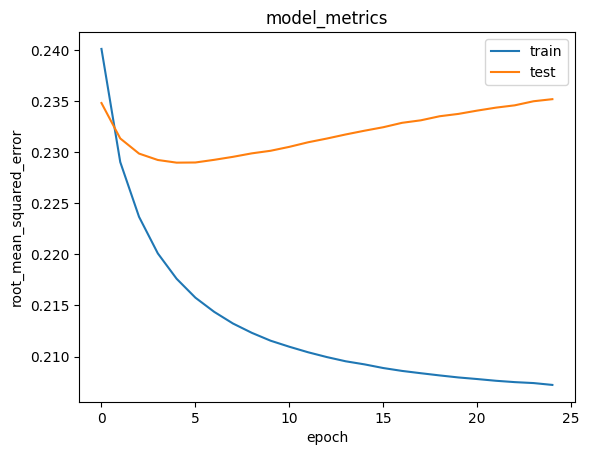

In [69]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<p>Dari Visualization di atas, dapat disimpulkan bahwa model lebih baik dalam memprediksi data latih dibandingkan data uji berdasarkan metrics RMSE. Dimana pada epochs ke-25, nilai RMSE pada data latih sebesar <b>0.2064</b> dan pada data uji sebesar <b>0.2352</b>.</p>

<p>Di bawah ini merupakan kode yang digunakan untuk persiapan evaluasi model. Berikut merupakan variables yang dipersiapkan untuk pengujian model:
<ul>
<li><b>user_id</b>: berisi user id yang dipilih secara acak.</li>
<li><b>movie_watched_by_user</b>: berisi movies yang sudah pernah ditonton dan diberikan rating oleh user.</li>
<li><b>movie_not_watched</b>: berisi movies yang belum pernah ditonton dan diberikan rating oleh user.</li>
</ul></p>

In [77]:
movie_df = df_movie
df_final_rating = df_movie_coll

# Get User Sample
user_id = df_final_rating['userId'].sample(1).iloc[0]
movie_watched_by_user = df_final_rating[df_final_rating['userId'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user['movieId'].values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encode.keys()))
)

movie_not_watched = [[movie_to_movie_encode.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encode.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

<p>Berikut merupakan code yang digunakan untuk melakukan prediksi terhadap variable <b>user_id</b> yang sebelumnya sudah dibuat.</p>

In [78]:
# Test ML Model
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)

print('----' * 8)
print('Top 10 Movie Recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
Showing recommendations for users: 24651.0
Movie with high ratings from user
--------------------------------
Heat : Action|Crime|Thriller
Casino : Crime|Drama
Seven (a.k.a. Se7en) : Mystery|Thriller
Broken Arrow : Action|Adventure|Thriller
Taxi Driver : Crime|Drama|Thriller
--------------------------------
Top 10 Movie Recommendation
--------------------------------
Persuasion : Drama|Romance
City of Lost Children, The (Cité des enfants perdus, La) : Adventure|Drama|Fantasy|Mystery|Scifi
Usual Suspects, The : Crime|Mystery|Thriller
Lamerica : Adventure|Drama
Postman, The (Postino, Il) : Comedy|Drama|Romance
Antonia's Line (Antonia) : Comedy|Drama
Hate (Haine, La) : Crime|Drama
Bottle Rocket : Adventure|Comedy|Crime|Romance
Anne Frank Remembered : Documentary
Chungking Express (Chung Hing sam lam) : Drama|Mystery|Romance


<p>Output di atas merupakan hasil dari recommendation ML Model Collaborative Filtering. Dimana user dengan id <b>24651</b> terlihat sangat menyukai movie dengan genre <b>Action</b>, <b>Crime</b>, dan <b>Thriller</b>. Dan model pun memberikan recommendation movies dengan genre yang serupa seperti <b>The Usual Suspects</b>, dan <b>Hate (Haine, La)</b>.</p>

<h1>Conclusion</h1>
<p>Sehingga dapat disimpulkan, bahwa baik itu metode content-based maupun collaborative filtering, keduanya menghasilkan performa yang cukup baik. Tetapi kondisi ini masih sangat mungkin untuk dilakukan optimasi, terutama dalam proses Data Preprocessing.</p>